---

#[Keras MNIST 예제코드](https://)

---

#[1) MNIST dataset](https://)

In [11]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)




---



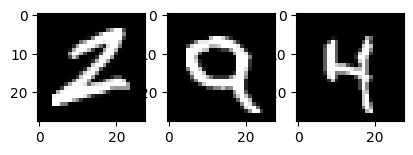

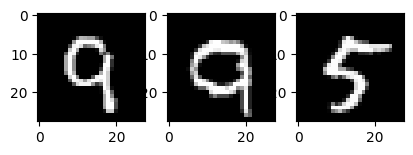

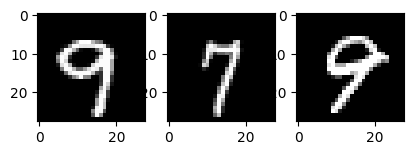

In [12]:
#input data들은 (28,28) 이미지이고 라벨은 정수 타입
#이미지들을 간단하게 시각화

import matplotlib.pyplot as plt
import random

for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()

#60000개의 이미지중에 랜덤하게 나옴
#이미지들을 살펴보면 흑백 이미지에 28*28 size



---



In [13]:
#x_train,x_test에는 (28,28) -> (28,28,1)로 모양을 변경
#기존 DNN의 경우에는 기본적으로 2차원이나 3차원 데이터를 Flatten으로 1차원 형태로 변형시켜 사용한다. 28 x 28의 흑백 이미지는 768개의 1차원 형태로 입력을 받는다.
#이 작업을 해야 후에 Conv2D 레이어에 인풋으로 넣을수 있기 때문임

#또한 0~255 값의 범위를 0~1로 바꿔줌
#반면에 y_train,y_test에는 to_categorical이라는 함수를 사용해 onehot 벡터로 만들기 위함
#예를들어, 5 -> [0,0,0,0,0,1,0,0,0,0] 0 -> [1,0,0,0,0,0,0,0,0,0] 이런식으로 값을 바꾸는 것임

from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28,28,1)/255.
x_test = x_test.reshape(-1,28,28,1)/255.

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



---



In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D

---

#[2) Model 구성](https://)
- [2D 컨볼루션 레이어](https://)
>- 가장 보편적으로 사용되는 컨볼루션 유형은 2D 컨볼루션 레이어이며, 보통 conv2D라고 줄여서 씀
>- conv2D 레이어에 속한 필터, [즉 커널이 2D 입력 데이터로 "슬라이드"하여 요소를 대상으로 곱셈을 수행함](https://)
>- 따라서 [결과를 합쳐 하나의 출력 픽셀로 도출하게 됨](https://)
>- 커널은 자신이 슬라이드하는 모든 위치마다 같은 연산을 수행하여 특징점의 2D 매트릭스를 여러 가지 특징점 2D 매트릭스로 변환함
- [BatchNormalization](https://)
>- 딥러닝 모델에서 [학습을 안정화하는 데 사용되는](https://) Keras 레이어
>- 일반적으로 합성곱 또는 fully connected layer(완전 연결 층: 케라스에서는 Dense)와 함께 사용되며, 입력 텐서의 각 배치에 대해 정규화를 수행함
>- BatchNormalization 레이어는 다음과 같은 이점이 있음
>>- [그래디언트 소실 문제를 완화](https://)
>>- 모델의 가중치 초기화에 덜 민감
>>- 상대적으로 큰 학습률 사용으로 학습 속도가 빨라짐
>>- 미니 배치 단위로 학습이 수행되므로 미니 배치 단위로 데이터의 분포가 다를 경우 학습을 안정화할 수 있음
>>- 정규화를 통해 과적합(overfitting) 문제를 방지



---



## [입력 데이터의 형태에 따라 input_shape의 튜플은 달라질 수 있음](https://)
- 1차원 데이터: (특징 수,)
- 2차원 시퀀스 데이터: (시퀀스 길이, 특징 수)
- 3차원 이미지 데이터: (높이, 너비, 채널 수)
- 4차원 이미지 데이터(배치 포함): (배치 크기, 높이, 너비, 채널 수)
>- 3차원 데이터
>>- 일반적으로 이미지 데이터의 경우 4차원 배열 형태로 입력
>>- 예를 들어, CIFAR-10 데이터셋은 32x32 크기의 컬러 이미지(RGB=3)로 구성되어 있으므로, 입력 데이터는 (num_samples, 32, 32, 3) 형태의 4차원 배열로 표현됨
>>- 따라서 num_samples을 제외한 (높이, 너비, 채널 수)인 (32, 32, 3)는 32x32 크기의 이미지가 3개의 채널을 의미함



---



## [Conv2D(32, (5, 5), padding='valid', input_shape=(28, 28, 1)](https://)activation='relu')의미
- [첫번째 인자 - 컨볼루션 필터의 수](https://)
- [두번째 인자 - 컨볼루션 커널의 (행, 열)](https://)
- [padding - 경계 처리 방법을 정의](https://)
>- valid - 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작음
>- same - 출력 이미지 사이즈가 입력 이미지 사이즈와 동일함
-[ input_shape - 샘플 수를 제외한 입력 형태를 정의](https://)
>- 모델에서[ 첫 레이어일 때만 정의하면 됨](https://)
>- (행, 열, 채널 수)로 정의함
>>- 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정
-[ activation - 활성화 함수 설정](https://)
>- linear - 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 [그대로 출력으로 나옴](https://)
>- relu - rectifier 함수,[ 은익층에 주로 쓰임](https://)
>- sigmoid - 시그모이드 함수, [이진 분류 문제에서](https://) 출력층에 주로 쓰임
>- softmax - 소프트맥스 함수,[ 다중 클래스 분류 문제](https://)에서 출력층에 주로 쓰임

*****************************************************************************
- [Conv2D(1, (2, 2), padding='valid', input_shape=(3, 3, 1))](https://)
>- 입력 이미지는 채널 수가 1, 너비가 3 픽셀, 높이가 3 픽셀이고,
>- 크기가 2 x 2인 필터가 하나인 경우를 레이어를 나타냄
>- 단 image_data_format이 ‘channels_last’임



In [15]:
#Sensorflow.keras에서 Sequential모델을 가져오는데 레이어들을 순차적으로 쌓을수 있게해주는 모델임
#Dense,Flatten,BatchNormalization,Conv2D 레이어를 이용해서 간단한 신경망을 구성

model = Sequential()

#input_shape=(28, 28, 1) - 컨볼루션넷은 (image_height, image_width, image_channels) 크기의 입력텐서를 사용한다는 점이 중요
#MNIST 이미지 포멧인 (28, 28, 1) 크기의 입력을 처리하도록 함

#Conv2D와 MaxPooling2D의 출력은 (height, width, channels) 크기의 3D텐서로 출력
#결과는 높이와 너비 차원은 네트워크기 깊어질수록 작아지는 경향이 있음

model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511,690 (1.95 MB)

 Trainable params: 510,794 (1.95 MB)

 Non-trainable params: 896 (3.50 KB)

---

#[3) Model Train](https://)

In [16]:
#모델을 구성하고 나서 loss함수, optimizer를 지정해줌
#분류 작업을 하고있기 때문에 categorical_crossentropy로 해야하며 옵티마이저는 가장 무난한 adam을 사용
#metrics=["acc"] 이부분은 accuracy 파라미터를 모니터링하기위해 넣어줌
#이후 model.fit을 사용하여 모델을 훈련시킴

model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=256)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - acc: 0.8968 - loss: 0.3305 - val_acc: 0.2368 - val_loss: 2.1134
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - acc: 0.9895 - loss: 0.0321 - val_acc: 0.9649 - val_loss: 0.1136
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9946 - loss: 0.0169 - val_acc: 0.9871 - val_loss: 0.0402
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9968 - loss: 0.0096 - val_acc: 0.9846 - val_loss: 0.0558
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9963 - loss: 0.0123 - val_acc: 0.9893 - val_loss: 0.0355
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9977 - loss: 0.0059 - val_acc: 0.9901 - val_loss: 0.0367
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9981 - loss: 0.0058 - val_acc: 0.9870 - val_loss: 0.0512
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9962 - loss: 0.0115 - val_acc: 0.9863 - val_loss: 0.0627
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20m



---



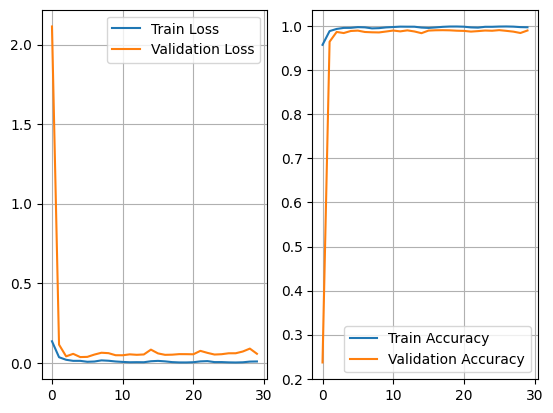

In [17]:
loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]

plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()

#훈련후 Train_loss,Train_accuracy, validation_loss, validation accuracy를 시각화
#결과로 볼때 안정적으로 수렴하였으며 accuracy 기준으로는 마지막 epoch에서 가장 높은 0.9925 가 나왔음
#더 훈련진행이 가능하지만~~~~

---

#[4) 결과 확인](https://)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
Actual : 8	Predict : 8


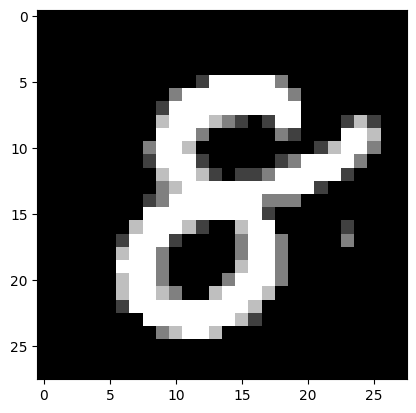

In [18]:
#이제 훈련한 모델로 간단한 예측을 진행
index =random.randint(0,9999)
plt.imshow(x_test[index],cmap="gray")
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)
#실행할떄마다 임의의 예측값을 반환

In [19]:
wrong_index_list=[]
predict = model.predict(x_test)
for index in range(10000):
    if np.argmax(y_test[index]) != np.argmax(predict[index]):
        wrong_index_list.append(index)
print(wrong_index_list)
print("총 틀린 갯수 : ",len(wrong_index_list))
#틀린것들을 랜덤하게 보여주고 있음
#여러번 실행해보면서 느낀건데 틀릴만 한 거같은 숫자들도 간혹 있는것 같음

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[18, 62, 115, 266, 321, 445, 582, 659, 716, 726, 740, 800, 883, 938, 947, 1014, 1226, 1242, 1247, 1260, 1522, 1527, 1611, 1621, 1686, 1790, 1878, 1955, 2035, 2129, 2130, 2135, 2182, 2280, 2329, 2447, 2488, 2597, 2654, 2927, 2939, 2953, 2959, 3060, 3062, 3225, 3289, 3422, 3448, 3520, 3647, 3726, 3727, 3780, 3808, 3926, 3941, 3943, 4007, 4199, 4256, 4289, 4360, 4443, 4497, 4507, 4571, 4639, 4740, 4761, 4807, 4943, 5749, 5937, 6011, 6026, 6059, 6597, 6625, 6651, 7849, 7928, 8316, 8325, 8520, 8527, 9009, 9015, 9024, 9036, 9653, 9664, 9729, 9792, 9839, 9922]
총 틀린 갯수 :  96


Actual : 3	Predict : 0


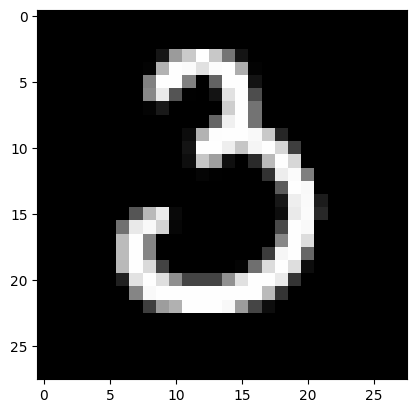

In [20]:
new_index = random.choice(wrong_index_list)
plt.imshow(x_test[new_index],cmap="gray")
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[new_index]),np.argmax(new_index)),)

#https://m.blog.naver.com/kswdavid/222683799572